In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

## Question 1 ##

### Question 1a ###

Soit $\psi$ une solution au problème de Cauchy considéré. 
Montrons que $\psi$ reste sur la sphère $S^2$ en tous temps. 

Posons la fonction du temps  $g : \mathbb{R} \to \mathbb{R}^+ $, définie sur $\mathbb{R}$ par  $t \mapsto \| \psi(t) \|^2 = \langle \psi(t), \psi(t) \rangle$,  où $\langle \cdot,\cdot \rangle$ est le produit scalaire canonique sur $\mathbb{R}^3$.

Le produit scalaire est une application bilinéaire donc de classe $C^\infty$. D'autre part $\psi$ est dérivable. Donc par composition, $g$ est dérivable sur $\mathbb{R}$, et on a, en utilisant le caractère symétrique du produit scalaire, pour tout $t \in \mathbb{R}$ : 
$$
\dot{g}(t) = \langle \dot{\psi}(t), \psi(t) \rangle + \langle \psi(t), \dot{\psi}(t) \rangle = 2 \langle \dot{\psi}(t), \psi(t) \rangle
$$
Donc pour tout $t \in \mathbb{R}$ : $\dot{g}(t) = 2 \langle r(t) \wedge \psi(t), \psi(t) \rangle = 0$

Car pour tous vecteurs $u,v \in \mathbb{R}^3$, on a $\langle a \wedge b, b \rangle = 0$, car $a \wedge b$ est par définition orthogonal à $b$.

Donc, sachant $\psi(0)\in S^2$, on a pour tout $t \in \mathbb{R}$ : $g(t) = g(0) = \| \psi(t) \|^2 =  1$

Donc pour tout $t \in \mathbb{R}$ : $\| \psi(t) \|^2 = 1$

Donc $\psi$ reste sur la sphère $S^2$ en tous temps. 

### Question 1b ###

En notant
$\psi = \begin{pmatrix} \psi_x \\ \psi_y \\ \psi_z \end{pmatrix} \in \mathbb{R}^3$, on calcule simplement les produits vectoriels, et on obtient :
$\\e_x \wedge \psi = -\psi_z e_y + \psi_y e_z = \Omega_x \psi$

$\
e_y \wedge \psi = \psi_z e_x - \psi_x e_z = \Omega_y \psi$

$\
e_z \wedge \psi = -\psi_y e_x + \psi_x e_y = \Omega_z \psi$

d'où le résultat souhaité : pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$

## Question 2 ##

In [6]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi*t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])
t_0=0.000001
t_f=20

def f(x,t,E,delta):
    return(np.dot(E*Omega_z+delta*u(t)*Omega_x,np.transpose(x)))


### Question 2a ###

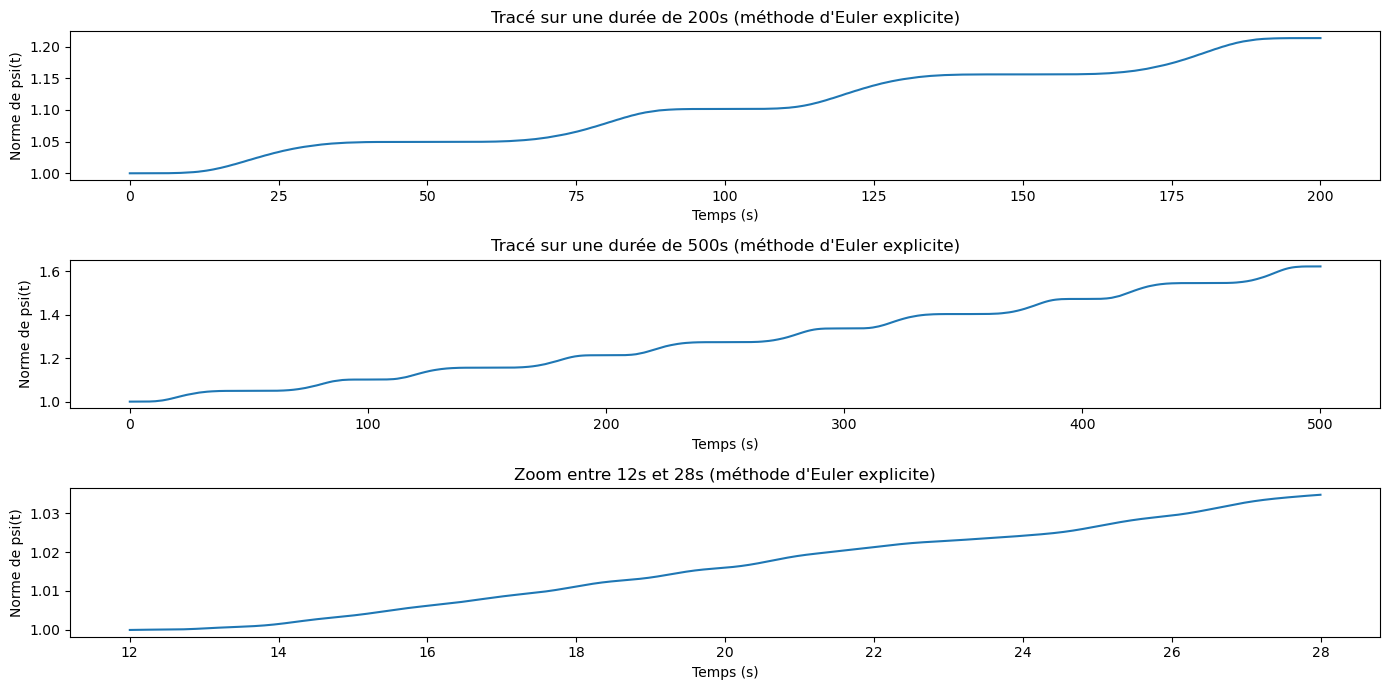

In [7]:
def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1],E,delta)*dt+psi[k-1]
    return(tps,psi)

Résolution_exp_a = euler_explicit(psi_0,0.000001,200,E,delta,dt)
Temps_exp_a = Résolution_exp_a[0]
Norme_psi_exp_a = np.linalg.norm(Résolution_exp_a[1],ord=2,axis=1)

Résolution_exp_b = euler_explicit(psi_0,0.000001,500,E,delta,dt)
Temps_exp_b = Résolution_exp_b[0]
Norme_psi_exp_b = np.linalg.norm(Résolution_exp_b[1],ord=2,axis=1)

Résolution_exp_c = euler_explicit(psi_0,12,28,E,delta,dt)
Temps_exp_c = Résolution_exp_c[0]
Norme_psi_exp_c = np.linalg.norm(Résolution_exp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(Temps_exp_a,Norme_psi_exp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 200s (méthode d'Euler explicite)")

plt.subplot(3, 1, 2)
plt.plot(Temps_exp_b,Norme_psi_exp_b)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 500s (méthode d'Euler explicite)")

plt.subplot(3, 1, 3)
plt.plot(Temps_exp_c,Norme_psi_exp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler explicite)")

plt.tight_layout()
plt.show()

On observe que la norme de $\psi$ est croit avec le temps. Ceci prouve que la simulation numérique par la méthode explicite n'est pas satisfaisante, puisque la théorie a prouvé qu'elle reste constante égale à 1.




### Question 2b ###

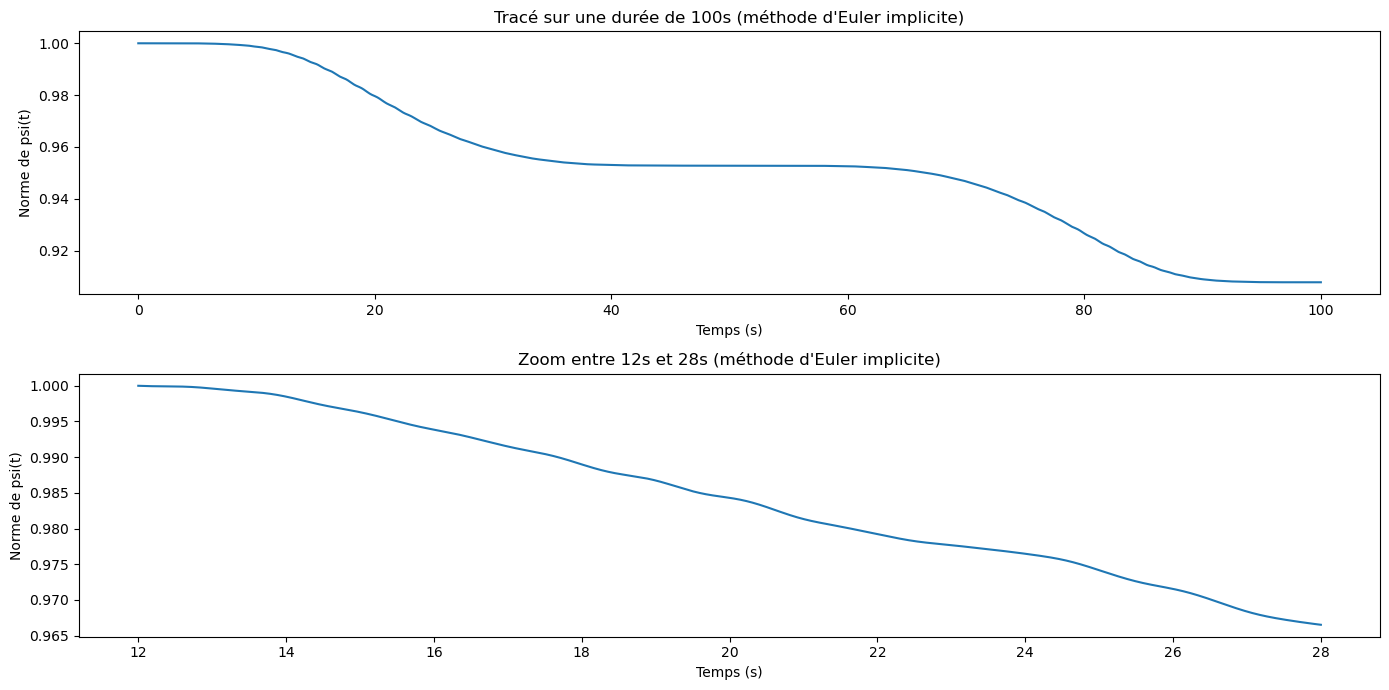

In [8]:
def g(x,t,E,delta):
    return(np.dot(np.linalg.inv(np.identity(3) - dt*(E*Omega_z+delta*u(t+dt)*Omega_x)),np.transpose(x)))

def euler_implicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = g(psi[k-1],tps[k-1],E,delta)
    return(tps,psi)

Résolution_imp_a = euler_implicit(psi_0,0.000001,100,E,delta,dt)
Temps_imp_a = Résolution_imp_a[0]
Norme_psi_imp_a = np.linalg.norm(Résolution_imp_a[1],ord=2,axis=1)

Résolution_imp_c = euler_implicit(psi_0,12,28,E,delta,dt)
Temps_imp_c = Résolution_imp_c[0]
Norme_psi_imp_c = np.linalg.norm(Résolution_imp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(Temps_imp_a,Norme_psi_imp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 100s (méthode d'Euler implicite)")

plt.subplot(2, 1, 2)
plt.plot(Temps_imp_c,Norme_psi_imp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler implicite)")

plt.tight_layout()
plt.show()

On observe ici le phénomène inverse : la norme de $\psi$ est décroit avec le temps. Ceci prouve que la simulation numérique par la méthode implicite n'est pas non plus satisfaisante, puisque la théorie a prouvé qu'elle reste constante égale à 1.


### Question 2c ###

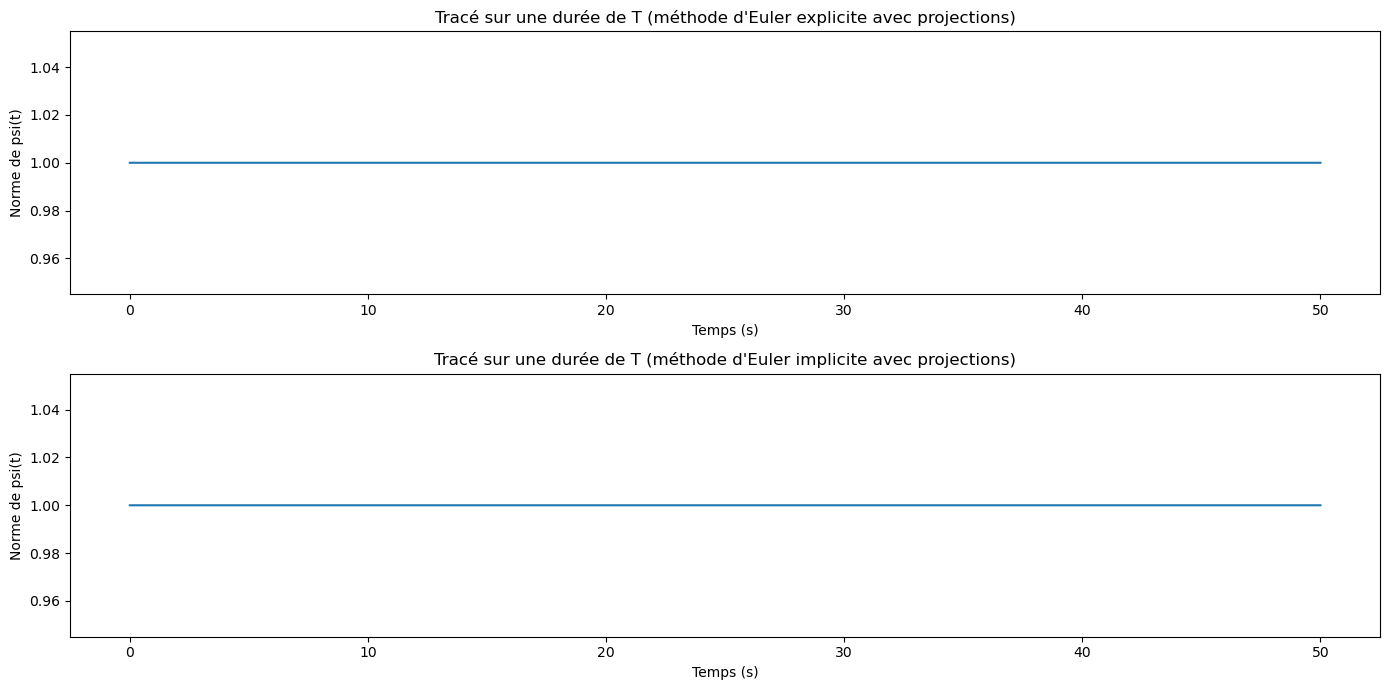

In [9]:
# La projection sur la sphère de l'état au temps k, psi[k] est le vecteur psi[k] normalisé.

def euler_explicit_projection(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1],E,delta)*dt+psi[k-1]
        if np.linalg.norm(psi[k],ord=2) > 0 :
            psi[k] = (np.linalg.norm(psi[k],ord=2)**(-1))*psi[k]
    return(tps,psi)

def euler_implicit_projection(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi_non_norme = g(psi[k-1],tps[k-1],E,delta)
        if np.linalg.norm(psi_non_norme,ord=2) > 0 :
            psi[k] = (np.linalg.norm(psi_non_norme,ord=2)**(-1))*psi_non_norme
        else :
            psi[k] = psi_non_norme
    return(tps,psi)


Résolution_exp_projection = euler_explicit_projection(psi_0,0.000001,50,E,delta,dt)
Temps_exp_projection = Résolution_exp_projection[0]
Norme_psi_exp_projection = np.linalg.norm(Résolution_exp_projection[1],ord=2,axis=1)

Résolution_imp_projection = euler_implicit_projection(psi_0,0.000001,50,E,delta,dt)
Temps_imp_projection = Résolution_imp_projection[0]
Norme_psi_imp_projection = np.linalg.norm(Résolution_imp_projection[1],ord=2,axis=1)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(Temps_exp_projection,Norme_psi_exp_projection)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de T (méthode d'Euler explicite avec projections)")

plt.subplot(2, 1, 2)
plt.plot(Temps_imp_projection,Norme_psi_imp_projection)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de T (méthode d'Euler implicite avec projections)")

plt.tight_layout()
plt.show()



On observe que la norme de $\psi$ est bien constante égale à 1 au cours du temps, ce qui est cohérent avec la reprojection de l'état sur la sphère à chaque pas de temps.

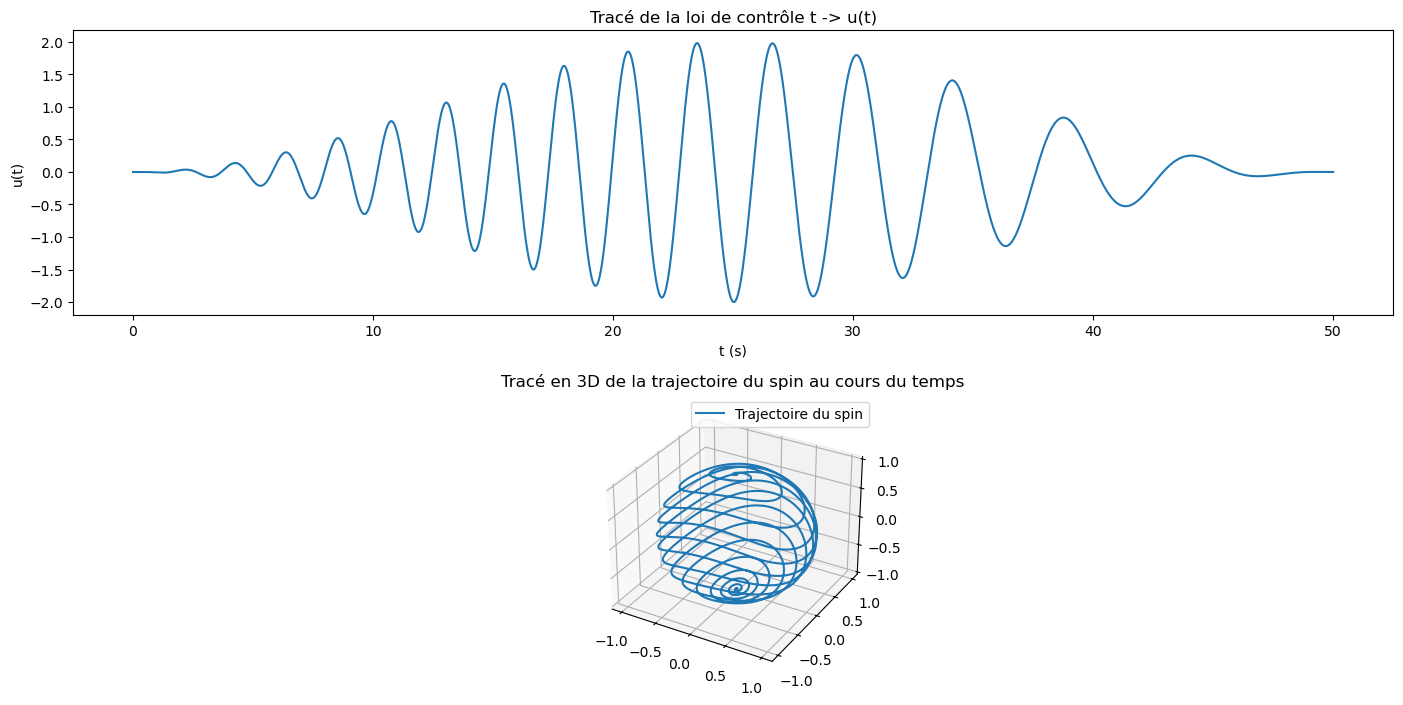

In [10]:
plt.figure()

# Tracé de la loi de contrôle t -> u(t) :

plt.subplot(2, 1, 1)
plt.plot(Temps_exp_projection,u(Temps_exp_projection))
plt.xlabel("t (s)")
plt.ylabel("u(t)")
plt.title("Tracé de la loi de contrôle t -> u(t)")

# Tracé de la trajectoire du spin t -> psi(t) en 3D :

ax = plt.subplot(2, 1, 2, projection='3d')
X = Résolution_exp_projection[1][:, 0]
Y = Résolution_exp_projection[1][:, 1]
Z = Résolution_exp_projection[1][:, 2]

ax.plot(X, Y, Z, label="Trajectoire du spin")
ax.legend()
ax.set_title("Tracé en 3D de la trajectoire du spin au cours du temps")

plt.tight_layout()
plt.show()


Le spin semble tourbilllonner pour se stabiliser en $\ +e_z/-e_z$. Ces autres traçés soulignent ce résultat :

Text(0.5, 1.0, 'coordonée X')

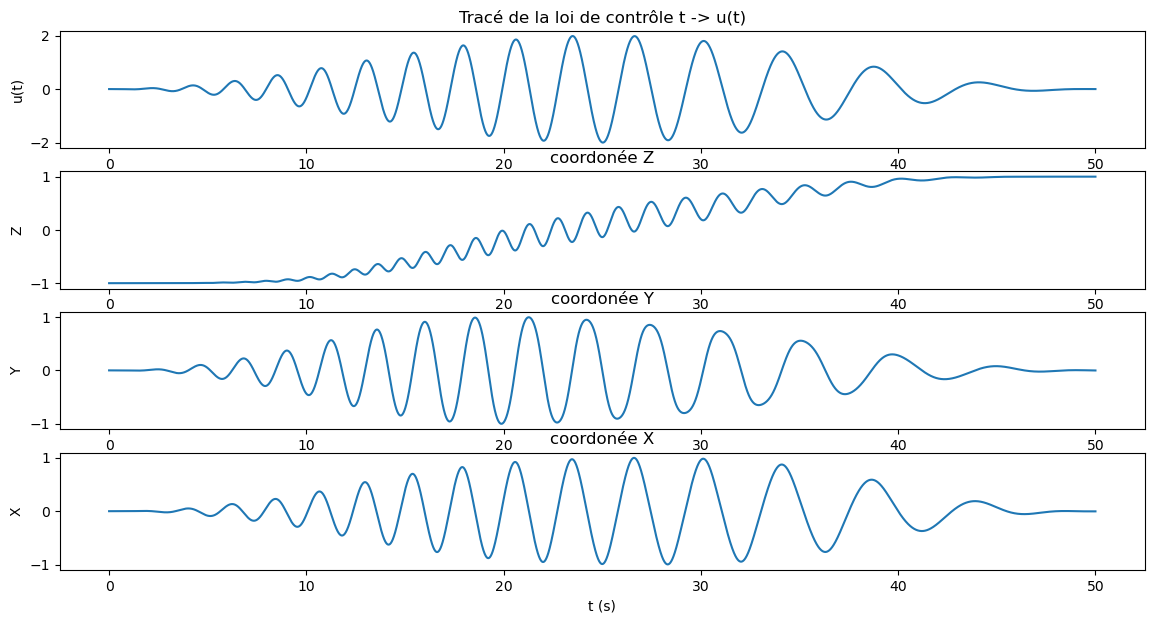

In [11]:
plt.subplot(4, 1, 1)
plt.plot(Temps_exp_projection,u(Temps_exp_projection))
plt.xlabel("t (s)")
plt.ylabel("u(t)")
plt.title("Tracé de la loi de contrôle t -> u(t)")

plt.subplot(4, 1, 2)
plt.plot(Temps_exp_projection,Z)
plt.xlabel("t (s)")
plt.ylabel("Z")
plt.title("coordonée Z")

plt.subplot(4, 1, 3)
plt.plot(Temps_exp_projection,Y)
plt.xlabel("t (s)")
plt.ylabel("Y")
plt.title("coordonée Y")

plt.subplot(4, 1, 4)
plt.plot(Temps_exp_projection,X)
plt.xlabel("t (s)")
plt.ylabel("X")
plt.title("coordonée X")

Entre [0,T] (où T= 50) la loi de contrôle permet bien de faire la transition de spin $\ -e_z$ vers $\ +e_z$ (elle fait tourbilloner le spin jusqu'a atteindre $\ +e_z$

## Question 3 ##

[ 0.11875303 -0.04733872  0.99179472]
[-0.00236779 -0.00124056  0.99999643]
[-0.18788191 -0.07354751  0.9794341 ]
[-0.14168055 -0.01218527  0.98983743]
[-0.0945696  -0.02242577  0.99526563]
[-0.15680766  0.03592459  0.98697557]
[-0.01853875  0.00617847  0.99980905]
[0.00917614 0.01581417 0.99983284]
[-0.01110191 -0.03029952  0.99947921]
[-0.01335918  0.0131311   0.99982454]
La précision moyenne du transfert est de 0.08236899178695413


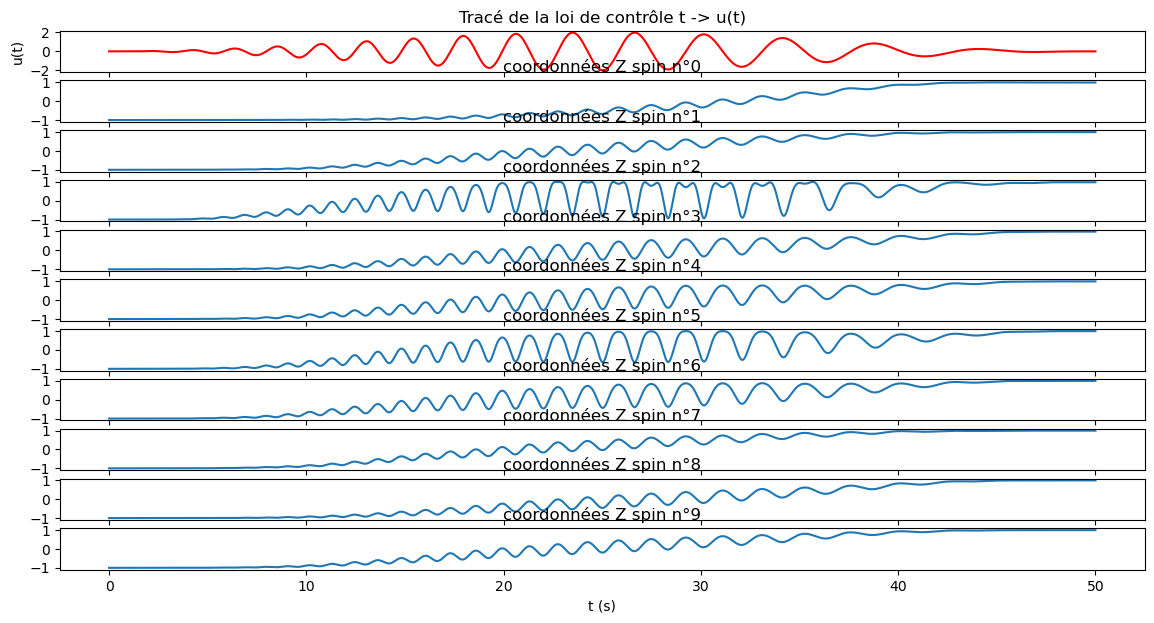

In [24]:
deltamin =0.4
deltamax =3.5
n=10
alpha = 0.5
E1 = np.random.uniform(-alpha,alpha,n) + E
delta1= np.random.uniform(deltamin,deltamax,n)
Resolution9spin = [euler_explicit_projection(psi_0,0.000001,T,E1[i],delta1[i],dt) for i in range(n)]
temps_nspin = Resolution9spin[0][0]

plt.subplot(n+1, 1, 1)
plt.plot(temps_nspin,u(temps_nspin),color = 'r')
plt.xlabel("t (s)")
plt.ylabel("u(t)")
plt.title("Tracé de la loi de contrôle t -> u(t)")
précision = 0
for i in range(n):
    Z = Resolution9spin[i][1][:, 2]
    précision += np.linalg.norm(np.array([0,0,1])-Resolution9spin[i][1][-1,:],ord=2)
    plt.subplot(n+1, 1, i+2)
    plt.plot(temps_nspin,Z)
    plt.xlabel("t (s)")
    plt.title(f"coordonnées Z spin n°{i}")
    print(Resolution9spin[i][1][-1,:])
print(f"La précision moyenne du transfert est de {précision/n}")
plt.show()


La même loi de controle parvient bien à transférer tous les spins avec une précision satisfaisante, de distance euclidienne de 0.1 en moyenne au vecteur $\ e_z$.

## Question 4 ##

### Question 4a ###

On a pour tout $t\geq 0$, $\psi(t) = U(t) \psi_0$,
donc on a :  
$$\begin{align*}
\dot{\psi}(t) &= \dot{U}(t) \psi_0 = \left( E \Omega_z + \delta u(t) \Omega_x \right) U(t) \psi_0\\
\dot{\psi}(t) &= \left( E \Omega_z + \delta u(t) \Omega_x \right) \psi(t)
\end{align*}$$

Ainsi, $\psi$ vérifie bien (3).

### Question 4b ###

$\hspace{1cm}$ Montrons dans un premier temps que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ :

Posons les fonctions du temps suivante :
$$
B : \mathbb{R}^+ \to \mathbb{R}^{3 \times 3}, \quad 
t \mapsto E \Omega_z+\delta u(t) \Omega_x 
$$
$$
M : \mathbb{R}^+ \to \mathbb{R}^{3 \times 3}, \quad 
t \mapsto U(t)^\top U(t)
$$
$\Omega_x$ et $\Omega_x$ étant des matrices antisymétriques, pour tout $t \in \mathbb{R}, B(t)$ est une matrice antisymétrique car $B(t)^\top = \left( E \Omega_Z + \delta u(t) \Omega_x \right)^\top = E \Omega_Z^\top + \delta u(t) \Omega_x^\top = -E \Omega_Z - \delta u(t) \Omega_x = -B(t) $.

D'autre part, $M$ est dérivable sur $\mathbb{R}^+$, car tous les coefficients de la matrice $U^\top U$ sont fonction polynomiale des coefficients de la matrice $U$, et on a : 
$$ \begin{align*}
\forall t \in \mathbb{R}^+, \quad \dot{M}(t) &= \dot{U}(t)^\top U(t) + U(t)^\top \dot{U}(t) \\
\dot{M}(t) &= \left[ B(t) U(t) \right]^\top U(t) + U(t)^\top \left[ B(t) U(t) \right] \\
\dot{M}(t) &= U(t)^\top B(t)^\top U(t) + U(t)^\top B(t) U(t) \\
\dot{M}(t) &= - U(t)^\top B(t) U(t) + U(t)^\top B(t) U(t) = 0
\end{align*}$$
Où l'on a utilisé :  $\dot{U}(t)^\top = U(t)^\top B(t)^\top $, égalitée obtenue en appliquant la transposition à (4), ainsi que $B(t)^\top = - B(t)$, qui se déduit de l'antisymétrie de $B(t)$.

Donc l'application $M$ est constante, et on a : $\forall t \in \mathbb{R}^+, \quad M(t) = M(0) = U(0)^\top U(0) = I_3$

Donc pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$.

$\hspace{1cm}$ Montrons dans un second temps que le determinant de $U$ reste égal à 1 :

La fonction du temps  $d : \mathbb{R}^+ \to \mathbb{R}$, définie sur $\mathbb{R}$ par  $t \mapsto det(U(t))$ est continue par composition. D'après ce qui précède, on sait que pour tout $t\geq 0$, $1= det(I_3) = det(U(t)^\top U(t)) = det(U(t)^\top)det(U(t)) = det(U(t))^2$, donc $d$ est à valeur dans $\{-1; 1\}$. D'autre part, $d(0) = det(U(0)) = det(I_3) = 1$, donc $d$ prend au moins une valeur positive (qui est donc 1).

Raisonnons par l'absurde en supposant qu'il existe $t_0 \in \mathbb{R}^*$ tel que $d(t_0) = -1$. Alors d'après le théorème des valeurs intermédiaires, $d$ s'annule en un point de l'intervalle $[0,t_0]$, ce qui est impossible sachant $d$ à valeurs dans $\{-1; 1\}$. 

Donc pour tout $t\geq 0$, $det(U(t)) = d(t) = 1$.

### Question BONUS 4c ###

On utilise une décomposition SVD: soit U une matrice carré réel de taille n alors on peut écrire $U$ sous la forme $U=QD_nP^T$
où $Q$ et $P$ sont des matrices orthogonales et $D_n$ est diagonale il s'avère que la plus proche matrice orthogonales s'écrit simplement $U' =QP^T$

Et ça tombe bien il existe une fonction numpy qui calcule le triplet $Q$, $D_n$ et $P^T$ directement: np.linalg.svd($U$)


Valeur finale de psi : [-0.00346703 -0.00148035  0.99999289]
Distance euclidienne entre le spin et e(z) en fin de transfert : 0.003769848997360664


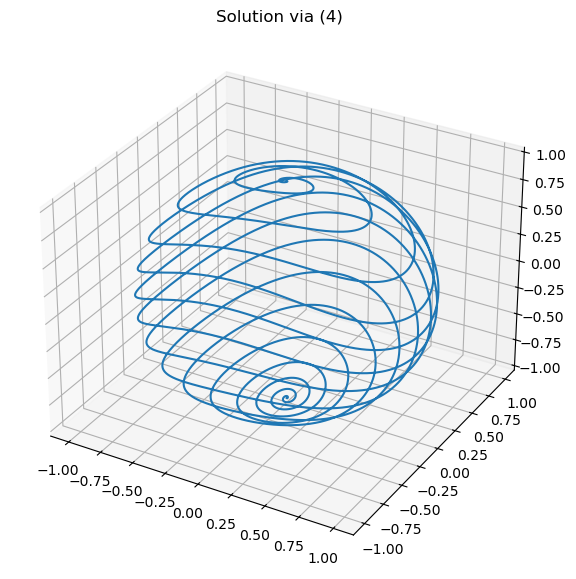

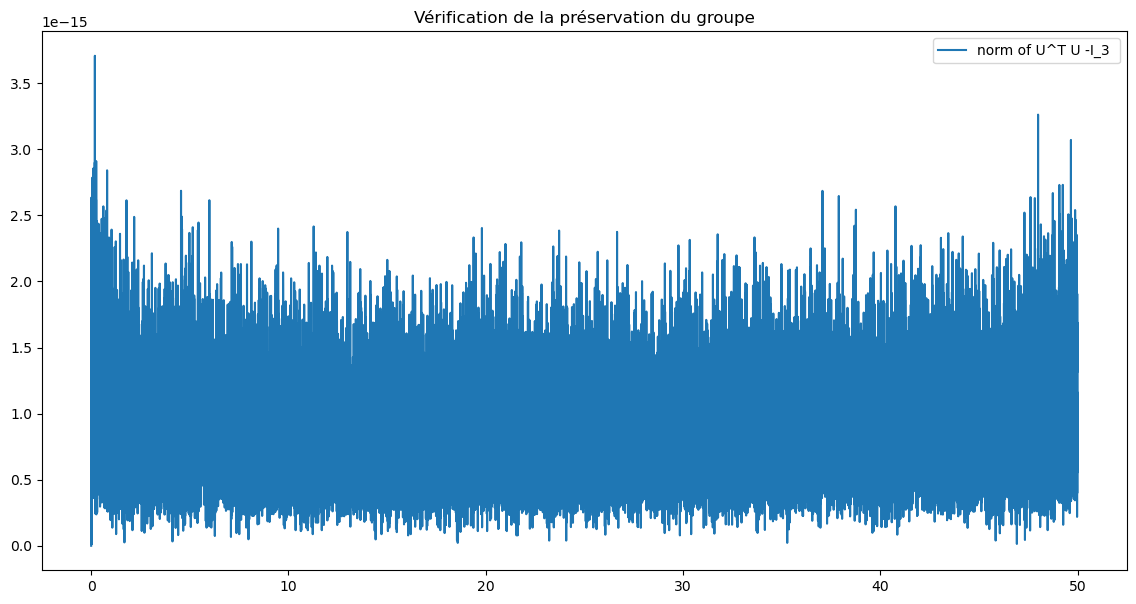

In [13]:
I=np.eye(3)

def matrice_transitionSVD(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        F =(E*Omega_z+delta*u(t)*Omega_x)
        sol[j+1]= np.dot(F,sol[j])*dt+sol[j]
        (Q,D,Pt) = np.linalg.svd(sol[j+1])
        sol[j+1]=np.dot(Q,Pt)
    return temps,sol

temps,sol_mat_trans = matrice_transitionSVD(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = plt.subplots()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")
print(f"Distance euclidienne entre le spin et e(z) en fin de transfert : {np.linalg.norm(np.array([0,0,1])-sol_mat_trans[-1]@psi_0,ord=2)}")

Ce deuxième graphe montre bien que U reste une matrice othogonale.

### Question 4d ###

$\hspace{1cm}$ Soit d'abord $A$ antisymétrique telle que $(I-A)$ est inversible. $(I+A) = (I-A)^\top$ donc $(I+A)$ est aussi inversible. On a :

$$
\begin{aligned}
    &\ (I+A)(I-A)^{-1}\left[(I+A)(I-A)^{-1}\right]^\top \\
    &\quad = \left(I + A\right)\left(I - A\right)^{-1}\left(I + A\right)^{-1}\left(I - A\right) \\
    &\quad = \left(I + A\right)\left(I - A^2\right)^{-1}\left(I - A\right) \\
    &\quad = \left(I + A\right)\left(I - A^2\right)^{-1}\left(I - A\right)\left(I + A\right)\left(I + A\right)^{-1} \\
    &\quad = \left(I + A\right)\left(I + A\right)^{-1} \\
    &\quad = I_n
\end{aligned}
$$

On en déduit donc que $(I+A)(I-A)^{-1}\in O(3)$. De plus:

$$
\begin{aligned}
    \det\left(I + A\right)\left(I - A\right)^{-1} 
    &= \det\left(I + A\right) \det\left(\left(I + A\right)^T\right)^{-1} \\
    &= \det\left(I + A\right)  \det\left(I + A\right)^{-1}\\
    &= 1
\end{aligned}
$$
Donc $(I+A)(I-A)^{-1}\in SO_3$

$\hspace{1cm}$ En posant ensuite pour tout $t\geq 0$, $A(t) = \frac{\Delta t}{2} B(t) $, qui est bien antisymétrique car $B(t)$ l'est, on a bien $(I-A)$ inversible car B est inversible. Donc $(I+A)(I-A)^{-1}\in SO_3$. Or on sait que $U^0= I_3 \in SO_3$. Donc, le résultat précédent assure que $U^j$ reste dans $SO_3$, par récurrence, car $SO_3$ est stable par produit matriciel.

On a ensuite en développant à l'ordre 1 en $\Delta t$ : 
$$\begin{align*}
\alpha(t_j, U(t_j), \Delta t) &= 
\left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left( 
I_3 + \frac{\Delta t}{2} B(t) 
\right) 
\left( 
I_3 + \frac{\Delta t}{2} B(t) + \mathcal{O}(\Delta t^2) 
\right) 
U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left( 
I_3 + \Delta t B(t) + \mathcal{O}(\Delta t^2) 
\right) 
U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left(
U(t_j) + \Delta t B(t) U(t_j) + \mathcal{O}(\Delta t^2)
\right)
 \\
\alpha(t_j, U(t_j), \Delta t) &= 
U(t_j) + \Delta t \dot{U}(t_j) + \mathcal{O}(\Delta t^2)
\end{align*}$$

Donc, l’erreur de troncature locale à l’itération j est donnée par : 
$$\begin{align*}
\eta^{j+1} &= \frac{U(t_{j+1}) - \alpha(t_j, U(t_j), \Delta t))}{\Delta t} \\
\end{align*}$$



Montrons que : $
 \|\eta^{j+1}\| \leq  c_s \Delta t$ (Schéma consistant d'ordre 1, avec un pas constant de $\Delta t$)

Rappelons d'abord que U est $C^{\infty}$. Ce résultat s'obtient par une récurrence immédiate en utilisant l'équation differentiel (4), en sachant que la fonction de controle $u \in C^{\infty}$.


On se place sur [0,T], 
et on applique la formule de taylor avec reste intégrale :
$$
U(t_{j+1}) = U(t_j + \Delta t) = U(t_j) + \Delta t \dot U +  \int_{t_j}^{t_{j+1}} \ddot{U}(t)(t_{j+1}-t) dt 
$$
Par un changement de variable on obtient :
$$
 \int_{t_j}^{t_{j+1}} \ddot{U}(t)(t_{j+1}-t) dt= \Delta t^2 \int_0^1 \ddot{U}(t_j + s \Delta t)(1 - s) ds.
$$
Ainsi on en déduit que :
$$
\eta^{j+1} = \Delta t\left( \int_0^1 \ddot{U}(t_j + s \Delta t)(1 - s) ds +\mathcal{O}(1)\right) 
$$
Donc en passant à la norme et en utilisant l'inégalité triangulaire :
$$
\|\eta^{j+1}\| \leq \Delta t\left( \int_0^1 \|\ddot{U}(t_j + s \Delta t)\|(1 - s) ds +K\right) \leq \frac{\Delta t}{2} \left( \max_{t \in [t_j, t_{j+1}]} \|\ddot{U}(t)\| +2K \right) \leq \frac{\Delta t}{2} \left( \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K \right).
$$
D'où finalement :
$$
\|\eta^{j+1}\| \leq \frac{\Delta t}{2} \left( \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K \right).
$$

Et on a bien un schéma consistant d'ordre $ \geq 1 $ pour l'équation différentiel (4) avec :
$$
c_s = \frac{ \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K }{2}.
$$


### Question 4e ###

On obtient bien une valeur final $\psi(T)$ très proche de $+e_z$,  comme cela est illustré par le tracé et par la distance euclidienne calculée :

Valeur finale de psi : [-0.00346685 -0.00148028  0.99999289]
0.0037696550213379915


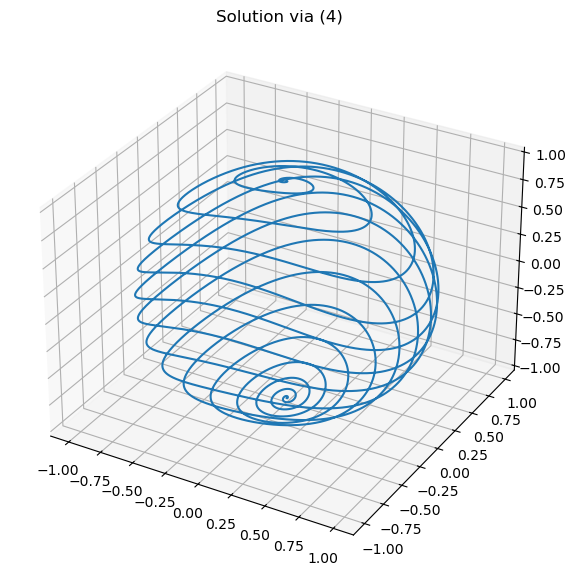

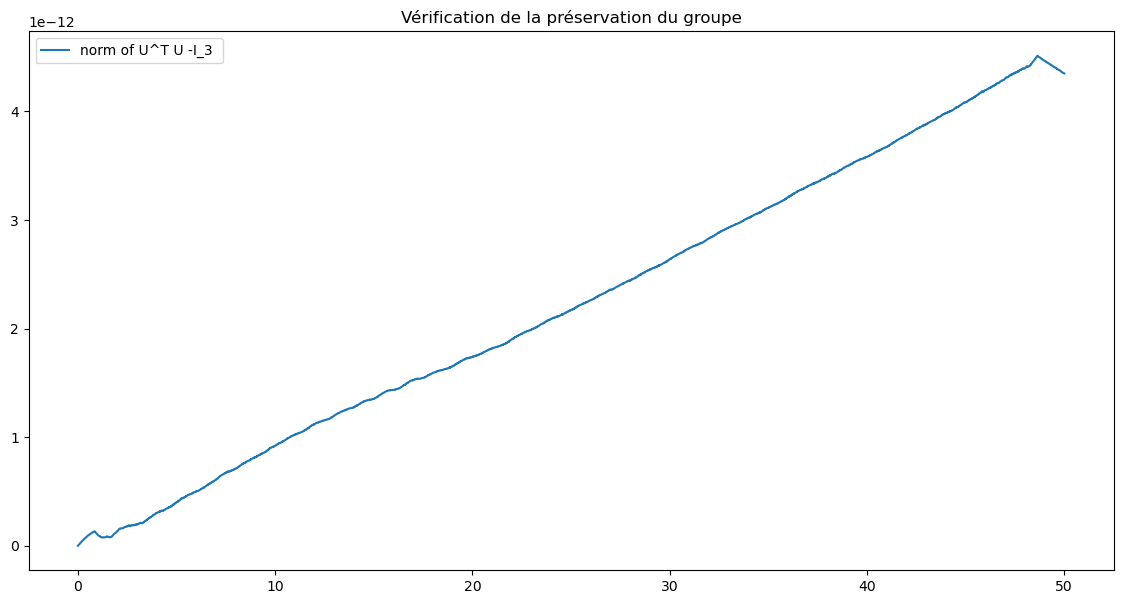

In [14]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A =(E*Omega_z+delta*u(t)*Omega_x)*dt/2
        sol[j+1]= np.dot(np.dot(I+A,np.linalg.inv(I-A)),sol[j])
    return temps,sol

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = plt.subplots()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")
print(np.linalg.norm(np.array([0,0,1])-sol_mat_trans[-1]@psi_0,ord=2))

Ce deuxième graphe montre bien que U reste une matrice othogonale, à l'erreur de précision machine près.

### Question BONUS 5 ###

L'interet de l'opérateur de flot est qu'il peut se généraliser pour passer de $t_1$ à un temps $t_2$ on le note $U(t_1,t_2)$
on a toujours $U(t_1,t_1) = I_n$ donc si on dispose de 2 processeurs par exemple on peut ainsi calculer séparément sur les deux procésseurs grâce à la méthode précédente  $U(0,t)$ pour $t \in [0,T/2]$ et $U(T/2,t)$ pour $t \in [T/2,T]$, on a ensuite directement $\psi(T)$ en multipliant $\psi_0$ par $U(0,T/2)$ puis  $\psi(T/2)$ par $U(T/2,T)$

Avec n procésseurs il suffit de diviser l'interval de temps T en n intervalles $[t_k,t_{k+1}]$ où $t_k = kT/n$

et on calcule les $U(t_k,t_{k+1})$ en les répartissant sur les n procésseurs

enfin $U(T)=U(t_{n-1},T)...U(t_{1},t_{2})U(0,t_{1})\psi_0$

On divise par n la compléxité par rapport au shéma conventionnel mais le produit matriciel final se fait en complexité $log_2(n)$ si on répartit les opérations matriciel par pairs sur les diférents procésseurs